In [7]:
## Necessary packages
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import warnings
warnings.filterwarnings("ignore")

import sys
import os

# Obtenir le chemin absolu du dossier TimeGAN
timegan_path = os.path.abspath("TimeGAN") 

# Ajouter TimeGAN au chemin des modules Python
if timegan_path not in sys.path:
    sys.path.append(timegan_path)

# 1. TimeGAN model
from timegan import timegan
# 2. Data loading
from data_loading import real_data_loading, sine_data_generation
# 3. Metrics
from metrics.discriminative_metrics import discriminative_score_metrics
from metrics.predictive_metrics import predictive_score_metrics
from metrics.visualization_metrics import visualization


import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import os

In [ ]:


base_dir = os.getcwd()
# Chemins des sous-dossiers pour train et test
file_path = os.path.join(base_dir, r'data/ hourly_day_ahead_prices_2017_2020.parquet')

df = pd.read_parquet(file_path)

# Convertir la colonne date en index
df.index = pd.to_datetime(df.index)

# Sélectionner la colonne des prix
col_name = "price"
time_series = df[col_name].values.reshape(-1, 1)
horizons = [6, 12, 24, 48, 72, 168]

# Normalisation
scaler = MinMaxScaler()
time_series_scaled = scaler.fit_transform(time_series)

# Définition de la séquence temporelle (ex: 24h)
seq_len = 24

# Création des séquences temporelles pour TimeGAN
def create_sequences(data, seq_length):
    X = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
    return np.array(X)

ori_data = create_sequences(time_series_scaled, seq_len)


FileNotFoundError: [Errno 2] No such file or directory: 'c:\\Users\\akues\\OneDrive\\Documents\\advancedTechniques\\data/ hourly_day_ahead_prices_2017_2020.parquet'

In [9]:
parameters = dict()
parameters['module'] = 'gru'  # ou 'lstm' si besoin
parameters['hidden_dim'] = 24  # Taille des couches cachées
parameters['num_layer'] = 3  # Nombre de couches
parameters['iterations'] = 10000  # Nombre d'itérations d'entraînement
parameters['batch_size'] = 128  # Taille du batch


In [ ]:
generated_data = timegan(ori_data, parameters)




Instructions for updating:
This class is equivalent as tf.keras.layers.GRUCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
 

Instructions for updating:
Please use tf.global_variables instead.
Discriminative score: 0.0

Predictive score: 0.0413


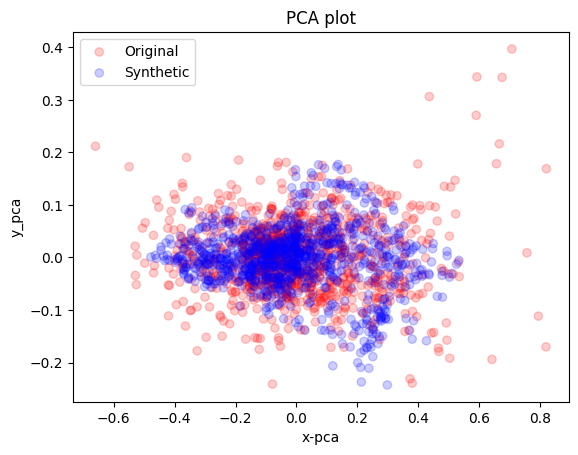

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.000s...
[t-SNE] Computed neighbors for 2000 samples in 0.094s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.054234
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.820862
[t-SNE] KL divergence after 300 iterations: 1.572709


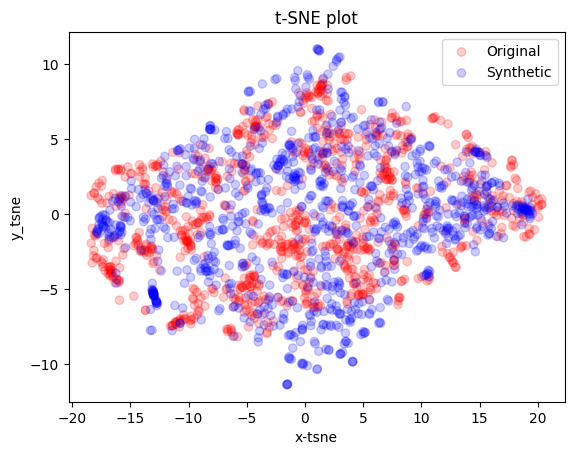

In [11]:
# Score de discrimination
metric_iteration = 5
discriminative_score = [discriminative_score_metrics(ori_data, generated_data) for _ in range(metric_iteration)]
print('Discriminative score:', np.round(np.mean(discriminative_score), 4))

# Score de prédiction
predictive_score = [predictive_score_metrics(ori_data, generated_data) for _ in range(metric_iteration)]
print('Predictive score:', np.round(np.mean(predictive_score), 4))

# Visualisation
visualization(ori_data, generated_data, 'pca')
visualization(ori_data, generated_data, 'tsne')


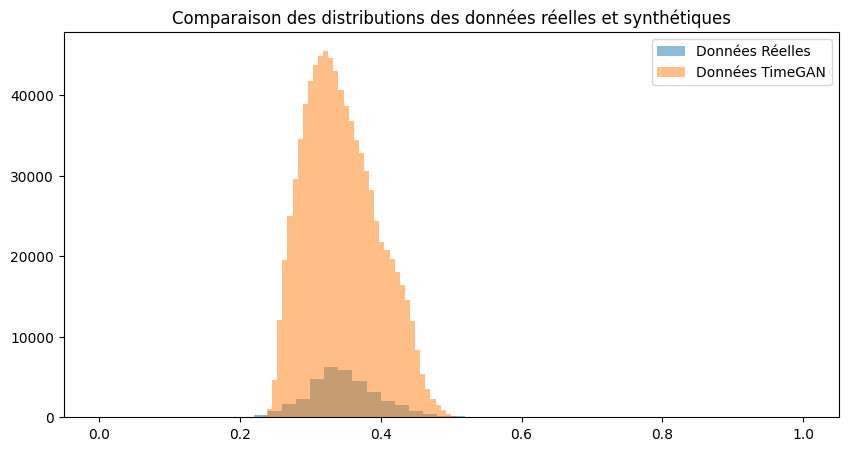

In [185]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.hist(time_series_scaled.flatten(), bins=50, alpha=0.5, label="Données Réelles")
plt.hist(generated_data.flatten(), bins=50, alpha=0.5, label="Données TimeGAN")
plt.legend()
plt.title("Comparaison des distributions des données réelles et synthétiques")
plt.show()


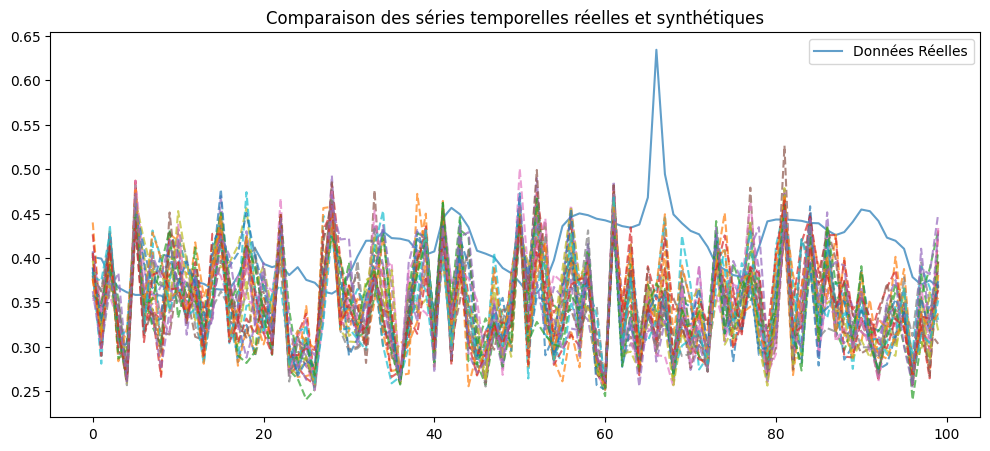

In [187]:
plt.figure(figsize=(12, 5))

# Sélectionner des échantillons au hasard
sample_real = time_series_scaled[:100]  # 100 premiers points de la vraie série
sample_synth = generated_data[:100, :, 0]  # 100 premiers points de la série générée

plt.plot(sample_real, label="Données Réelles", alpha=0.7)
plt.plot(sample_synth, linestyle="dashed", alpha=0.7)
plt.legend()
plt.title("Comparaison des séries temporelles réelles et synthétiques")
plt.show()
